# Forecast Assignment Report

## CAR PRICES PERFORMANCE IN THE US MARKET

### *In this report, we have provided our findings and discussions for car prices historical performance in the US market.*

*We wants to know how:*
- to determine which variables influences in setting the price of the car
- to identify cars which are most under/overpriced and the reasons behind that. 

*Our target or dependent variable in the dataset is 'MSRP- manufacturer's suggested retail price'.*

#### Import Data

*car_dataset contains all relevant information and technical specifications.*

*We begin by importing the necessary libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#  display car prices dataset
car_dataset=pd.read_csv('car_data_cleaned.csv')
car_dataset.head()

,id,Car_Make_Model_Style,Maker,MSRP,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,EPA Classification,...,Displacement (L),Displacement (cc),Rear Tire Width,Front Tire Width,Rear Wheel Size,Front Wheel Size,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year
0,0,2019 Acura RDX Specs: FWD w/Technology Pkg,Acura,40600.0,FWD w/Technology Pkg,Front Wheel Drive,5,4,Sport Utility,Small Sport Utility Vehicles 2WD,...,2.0,122.0,235.0,235.0,19,19,1.0,1.0,5.0,2019
1,1,2019 Acura RDX Specs: FWD w/Advance Pkg,Acura,45500.0,FWD w/Advance Pkg,Front Wheel Drive,5,4,Sport Utility,Small Sport Utility Vehicles 2WD,...,2.0,122.0,235.0,235.0,19,19,1.0,1.0,5.0,2019
2,2,2019 Acura RDX Specs: FWD w/A-Spec Pkg,Acura,43600.0,FWD w/A-Spec Pkg,Front Wheel Drive,5,4,Sport Utility,Small Sport Utility Vehicles 2WD,...,2.0,122.0,255.0,255.0,20,20,1.0,1.0,4.0,2019
3,3,2019 Acura RDX Specs: FWD,Acura,37400.0,FWD,Front Wheel Drive,5,4,Sport Utility,Small Sport Utility Vehicles 2WD,...,2.0,122.0,235.0,235.0,19,19,1.0,1.0,5.0,2019
4,4,2019 Acura RDX Specs: AWD w/Technology Pkg,Acura,42600.0,AWD w/Technology Pkg,All Wheel Drive,5,4,Sport Utility,Small Sport Utility Vehicles 4WD,...,2.0,122.0,235.0,235.0,19,19,1.0,1.0,5.0,2019


In [3]:
# Correcting the misspelled car maker names.
car_dataset['Maker'].replace('Bentl','Bentley',inplace=True)
car_dataset['Maker'].replace('Cadil','Cadillac',inplace=True)
car_dataset['Maker'].replace('Chevr','Chevrolet',inplace=True)
car_dataset['Maker'].replace('Chrys','Chrysler',inplace=True)
car_dataset['Maker'].replace('Hyund','Hyundai',inplace=True)
car_dataset['Maker'].replace('INFIN','INFINITI',inplace=True)
car_dataset['Maker'].replace('Jagua','Jaguar',inplace=True)
car_dataset['Maker'].replace('Lambo','Lamborghini',inplace=True)
car_dataset['Maker'].replace('Land','Land Rover',inplace=True)
car_dataset['Maker'].replace('Linco','Lincoln',inplace=True)
car_dataset['Maker'].replace('Lambo','Lamborghini',inplace=True)
car_dataset['Maker'].replace('Maser','Maserati',inplace=True)
car_dataset['Maker'].replace('McLar','McLaren',inplace=True)
car_dataset['Maker'].replace('Merce','Mercedes-Benz',inplace=True)
car_dataset['Maker'].replace('Mitsu','Mitsubishi',inplace=True)
car_dataset['Maker'].replace('Nissa','Nissan',inplace=True)
car_dataset['Maker'].replace('Porsc','Porsche',inplace=True)
car_dataset['Maker'].replace('Rolls','Rolls-Royce',inplace=True)
car_dataset['Maker'].replace('Subar','Subaru',inplace=True)
car_dataset['Maker'].replace('Toyot','Toyota',inplace=True)
car_dataset['Maker'].replace('Volks','Volkswagen',inplace=True)

#### Perform data checks

*We inspect various aspects of dataset.*

In [4]:
car_dataset.shape

(11457, 88)

In [5]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11457 entries, 0 to 11456
Data columns (total 88 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  11457 non-null  int64  
 1   Car_Make_Model_Style                11457 non-null  object 
 2   Maker                               11457 non-null  object 
 3   MSRP                                11408 non-null  float64
 4   Style Name                          11457 non-null  object 
 5   Drivetrain                          11457 non-null  object 
 6   Passenger Capacity                  11457 non-null  int64  
 7   Passenger Doors                     11457 non-null  int64  
 8   Body Style                          11457 non-null  object 
 9   EPA Classification                  7794 non-null   object 
 10  Base Curb Weight (lbs)              7516 non-null   float64
 11  Front Hip Room (in)                 8628 

In [6]:
car_dataset.describe()

,id,MSRP,Passenger Capacity,Passenger Doors,Base Curb Weight (lbs),Front Hip Room (in),Front Leg Room (in),Second Shoulder Room (in),Passenger Volume,Second Head Room (in),...,Displacement (L),Displacement (cc),Rear Tire Width,Front Tire Width,Rear Wheel Size,Front Wheel Size,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year
count,11457.000000,11408.000000,11457.000000,11457.000000,7516.000000,8628.000000,10892.000000,9744.000000,5915.000000,9780.000000,...,11306.000000,11018.000000,11456.000000,11456.000000,11457.000000,11457.000000,11456.000000,11457.000000,11449.000000,11457.000000
mean,5728.000000,46757.176893,5.038841,3.615344,3689.308010,56.967216,42.212651,57.461615,102.257481,38.309440,...,2.999204,203.254220,243.477654,239.910091,17.895697,17.881295,1.014541,1.000765,5.254695,2016.610806
std,3307.495351,39978.632981,1.458029,0.765427,641.898088,4.144232,1.571020,5.200195,22.214367,1.748564,...,1.397192,86.169656,27.038376,23.468558,1.419031,1.404196,0.045984,0.006333,1.164542,1.833207
min,0.000000,11990.000000,1.000000,2.000000,1808.000000,45.400000,35.800000,39.700000,44.000000,31.000000,...,1.000000,55.000000,155.000000,155.000000,14.000000,14.000000,1.000000,1.000000,3.000000,2014.000000
25%,2864.000000,29120.000000,5.000000,4.000000,3263.000000,54.100000,41.200000,54.500000,92.800000,37.400000,...,2.000000,122.000000,225.000000,225.000000,17.000000,17.000000,1.000000,1.000000,4.000000,2015.000000
50%,5728.000000,37442.500000,5.000000,4.000000,3635.000000,55.600000,41.900000,56.400000,98.700000,38.300000,...,3.000000,204.000000,245.000000,245.000000,18.000000,18.000000,1.000000,1.000000,5.000000,2016.000000
75%,8592.000000,49196.250000,5.000000,4.000000,4123.000000,60.730000,42.900000,60.500000,105.000000,39.200000,...,4.000000,241.000000,265.000000,255.000000,19.000000,19.000000,1.000000,1.000000,6.000000,2018.000000
max,11456.000000,548800.000000,15.000000,4.000000,8591.000000,67.600000,63.900000,71.400000,172.600000,65.200000,...,7.000000,427.000000,355.000000,325.000000,22.000000,22.000000,1.392157,1.058824,8.000000,2019.000000


*Now, lets plot the dataset to display the missing values.*

<AxesSubplot:>

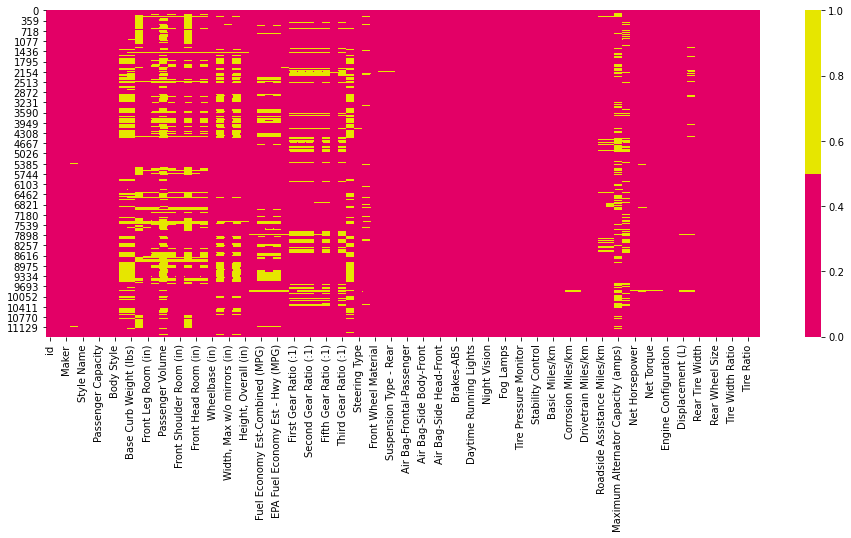

In [7]:
#  We checked for any missing values in the data. 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
cols = car_dataset.columns[:88] # first 87 columns
colours = ['#e30066', '#e6e600'] # specify the colours - yellow is missing. Red is not missing.
sns.heatmap(car_dataset[cols].isnull(), cmap=sns.color_palette(colours), xticklabels='auto')

*We then display the percentages of missing data.*

In [8]:
# display in percentage % of missing data
for col in car_dataset.columns:
    pct_missing = np.mean(car_dataset[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
Car_Make_Model_Style - 0%
Maker - 0%
MSRP - 0%
Style Name - 0%
Drivetrain - 0%
Passenger Capacity - 0%
Passenger Doors - 0%
Body Style - 0%
EPA Classification - 32%
Base Curb Weight (lbs) - 34%
Front Hip Room (in) - 25%
Front Leg Room (in) - 5%
Second Shoulder Room (in) - 15%
Passenger Volume - 48%
Second Head Room (in) - 15%
Front Shoulder Room (in) - 5%
Second Hip Room (in) - 33%
Front Head Room (in) - 5%
Second Leg Room (in) - 14%
Wheelbase (in) - 0%
Track Width, Front (in) - 28%
Width, Max w/o mirrors (in) - 1%
Track Width, Rear (in) - 28%
Height, Overall (in) - 1%
Fuel Tank Capacity, Approx (gal) - 1%
Fuel Economy Est-Combined (MPG) - 16%
EPA Fuel Economy Est - City (MPG) - 13%
EPA Fuel Economy Est - Hwy (MPG) - 17%
Fuel System - 1%
First Gear Ratio (:1) - 13%
Fourth Gear Ratio (:1) - 13%
Second Gear Ratio (:1) - 13%
Reverse Ratio (:1) - 6%
Fifth Gear Ratio (:1) - 14%
Trans Type - 0%
Third Gear Ratio (:1) - 13%
Final Drive Axle Ratio (:1) - 34%
Steering Type - 0%
Turning D

As we can see, there are few variables with missing data value. Due to this reason, we are going to assume they are insignificant in driving the prices of the car. 

We remove all columns where more than 40% of the values are null. This leaves me with the remaining columns below.

We are going to drop the insignificant variables.

In [9]:
# We can drop the insignificant columns as well as columns with missing values.

# Dropping Duplicates if any
car_dataset_v2=car_dataset.drop_duplicates()
car_dataset_v2.shape

# Drop columns with missing value of 20% and above
NA_val = car_dataset_v2.isna().sum()
def na_filter(na, threshold = .4): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/car_dataset_v2.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
car_data_cleaned = car_dataset_v2[na_filter(NA_val)]
car_data_cleaned.columns
# car_data_cleaned

Index(['id', 'Car_Make_Model_Style', 'Maker', 'MSRP', 'Style Name',
       'Drivetrain', 'Passenger Capacity', 'Passenger Doors', 'Body Style',
       'EPA Classification', 'Base Curb Weight (lbs)', 'Front Hip Room (in)',
       'Front Leg Room (in)', 'Second Shoulder Room (in)',
       'Second Head Room (in)', 'Front Shoulder Room (in)',
       'Second Hip Room (in)', 'Front Head Room (in)', 'Second Leg Room (in)',
       'Wheelbase (in)', 'Track Width, Front (in)',
       'Width, Max w/o mirrors (in)', 'Track Width, Rear (in)',
       'Height, Overall (in)', 'Fuel Tank Capacity, Approx (gal)',
       'Fuel Economy Est-Combined (MPG)', 'EPA Fuel Economy Est - City (MPG)',
       'EPA Fuel Economy Est - Hwy (MPG)', 'Fuel System',
       'First Gear Ratio (:1)', 'Fourth Gear Ratio (:1)',
       'Second Gear Ratio (:1)', 'Reverse Ratio (:1)', 'Fifth Gear Ratio (:1)',
       'Trans Type', 'Third Gear Ratio (:1)', 'Final Drive Axle Ratio (:1)',
       'Steering Type', 'Turning Diameter - C

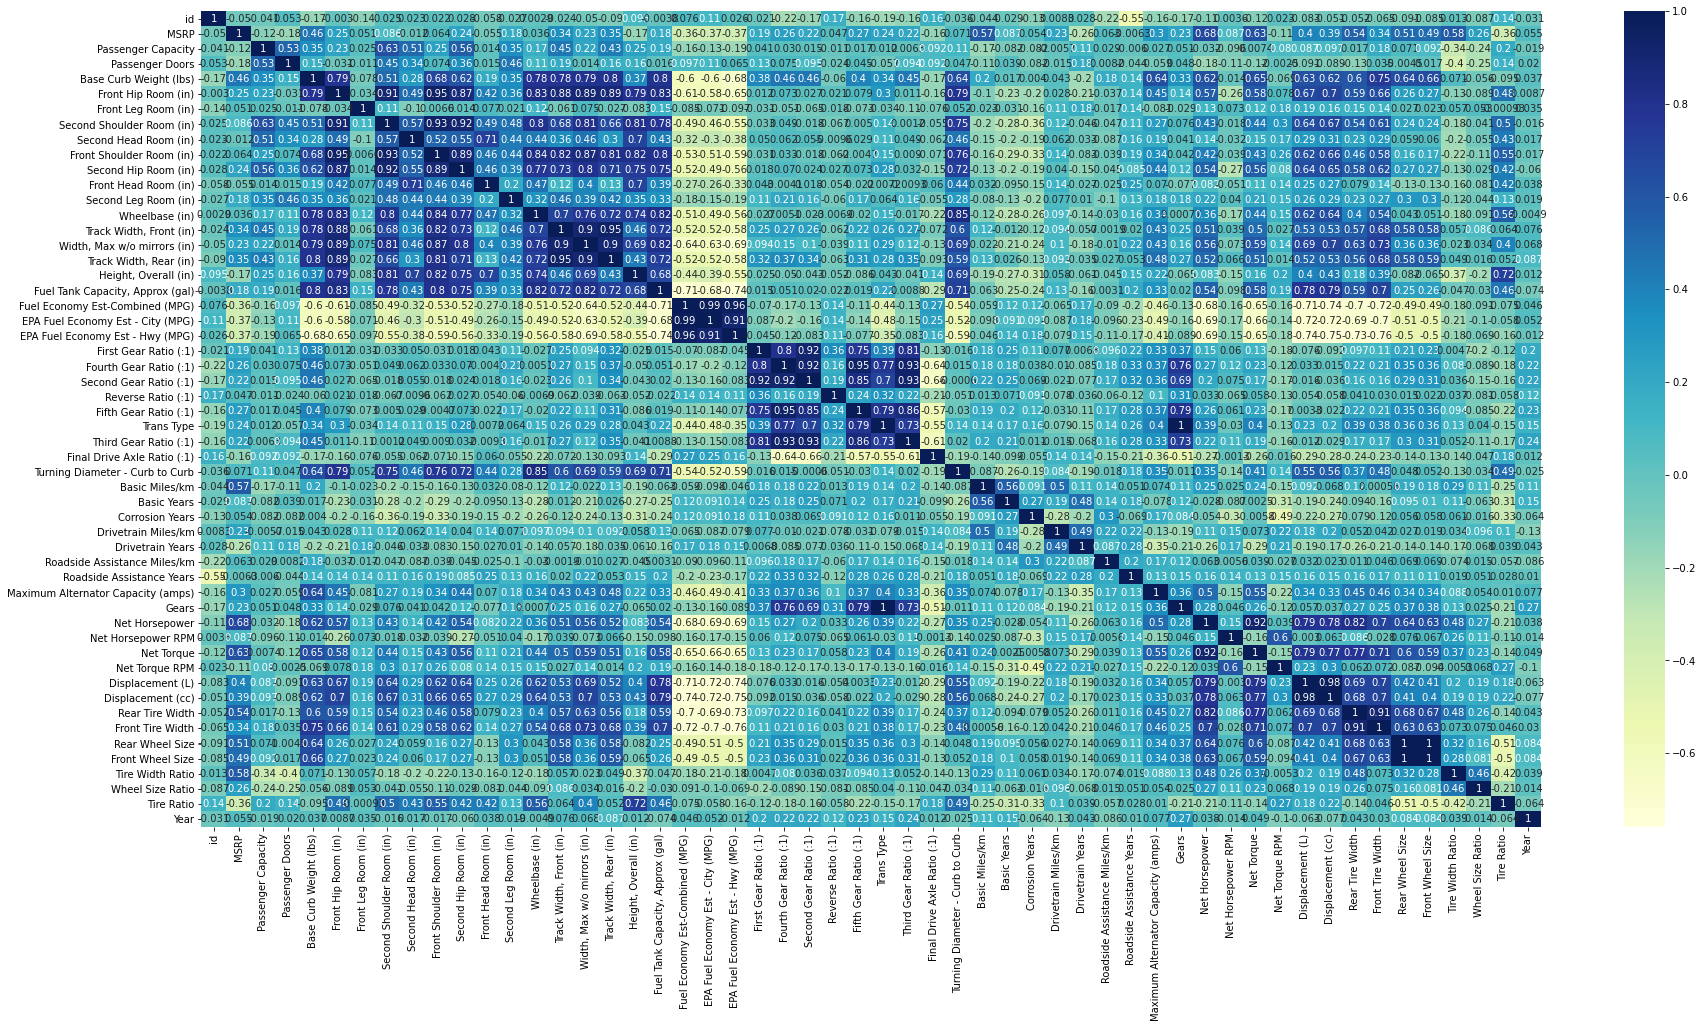

In [10]:
plt.figure(figsize = (30, 15))
cor=car_data_cleaned.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

Based on some research , I have dropped the variables which I believed are irrelevant to our car price analysis
and also has very low correlation with the MSRP.

In [11]:
car_data_cleaned.drop(['id','Passenger Capacity', 'Passenger Doors','Front Leg Room (in)', 'Second Shoulder Room (in)',
       'Second Head Room (in)', 'Front Shoulder Room (in)','Front Head Room (in)', 'Second Leg Room (in)','First Gear Ratio (:1)', 'Fourth Gear Ratio (:1)',
       'Second Gear Ratio (:1)', 'Reverse Ratio (:1)', 'Fifth Gear Ratio (:1)','Net Horsepower RPM','Net Torque RPM','Turning Diameter - Curb to Curb', 'Basic Years','Corrosion Years','Roadside Assistance Miles/km', 'Roadside Assistance Years',
       'Trans Type', 'Third Gear Ratio (:1)','Front Hip Room (in)','Second Hip Room (in)','Wheelbase (in)','Width, Max w/o mirrors (in)','Height, Overall (in)', 'Fuel Tank Capacity, Approx (gal)','Final Drive Axle Ratio (:1)','Track Width, Front (in)','EPA Fuel Economy Est - City (MPG)',
       'EPA Fuel Economy Est - Hwy (MPG)',],axis=1,inplace=True)
car_data_cleaned.head()

C:\Users\athir\anaconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Car_Make_Model_Style,Maker,MSRP,Style Name,Drivetrain,Body Style,EPA Classification,Base Curb Weight (lbs),"Track Width, Rear (in)",Fuel Economy Est-Combined (MPG),...,Displacement (L),Displacement (cc),Rear Tire Width,Front Tire Width,Rear Wheel Size,Front Wheel Size,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year
0,2019 Acura RDX Specs: FWD w/Technology Pkg,Acura,40600.0,FWD w/Technology Pkg,Front Wheel Drive,Sport Utility,Small Sport Utility Vehicles 2WD,3790.0,64.7,24.0,...,2.0,122.0,235.0,235.0,19,19,1.0,1.0,5.0,2019
1,2019 Acura RDX Specs: FWD w/Advance Pkg,Acura,45500.0,FWD w/Advance Pkg,Front Wheel Drive,Sport Utility,Small Sport Utility Vehicles 2WD,3829.0,64.7,24.0,...,2.0,122.0,235.0,235.0,19,19,1.0,1.0,5.0,2019
2,2019 Acura RDX Specs: FWD w/A-Spec Pkg,Acura,43600.0,FWD w/A-Spec Pkg,Front Wheel Drive,Sport Utility,Small Sport Utility Vehicles 2WD,3821.0,64.7,24.0,...,2.0,122.0,255.0,255.0,20,20,1.0,1.0,4.0,2019
3,2019 Acura RDX Specs: FWD,Acura,37400.0,FWD,Front Wheel Drive,Sport Utility,Small Sport Utility Vehicles 2WD,3783.0,64.7,24.0,...,2.0,122.0,235.0,235.0,19,19,1.0,1.0,5.0,2019
4,2019 Acura RDX Specs: AWD w/Technology Pkg,Acura,42600.0,AWD w/Technology Pkg,All Wheel Drive,Sport Utility,Small Sport Utility Vehicles 4WD,4026.0,64.7,23.0,...,2.0,122.0,235.0,235.0,19,19,1.0,1.0,5.0,2019


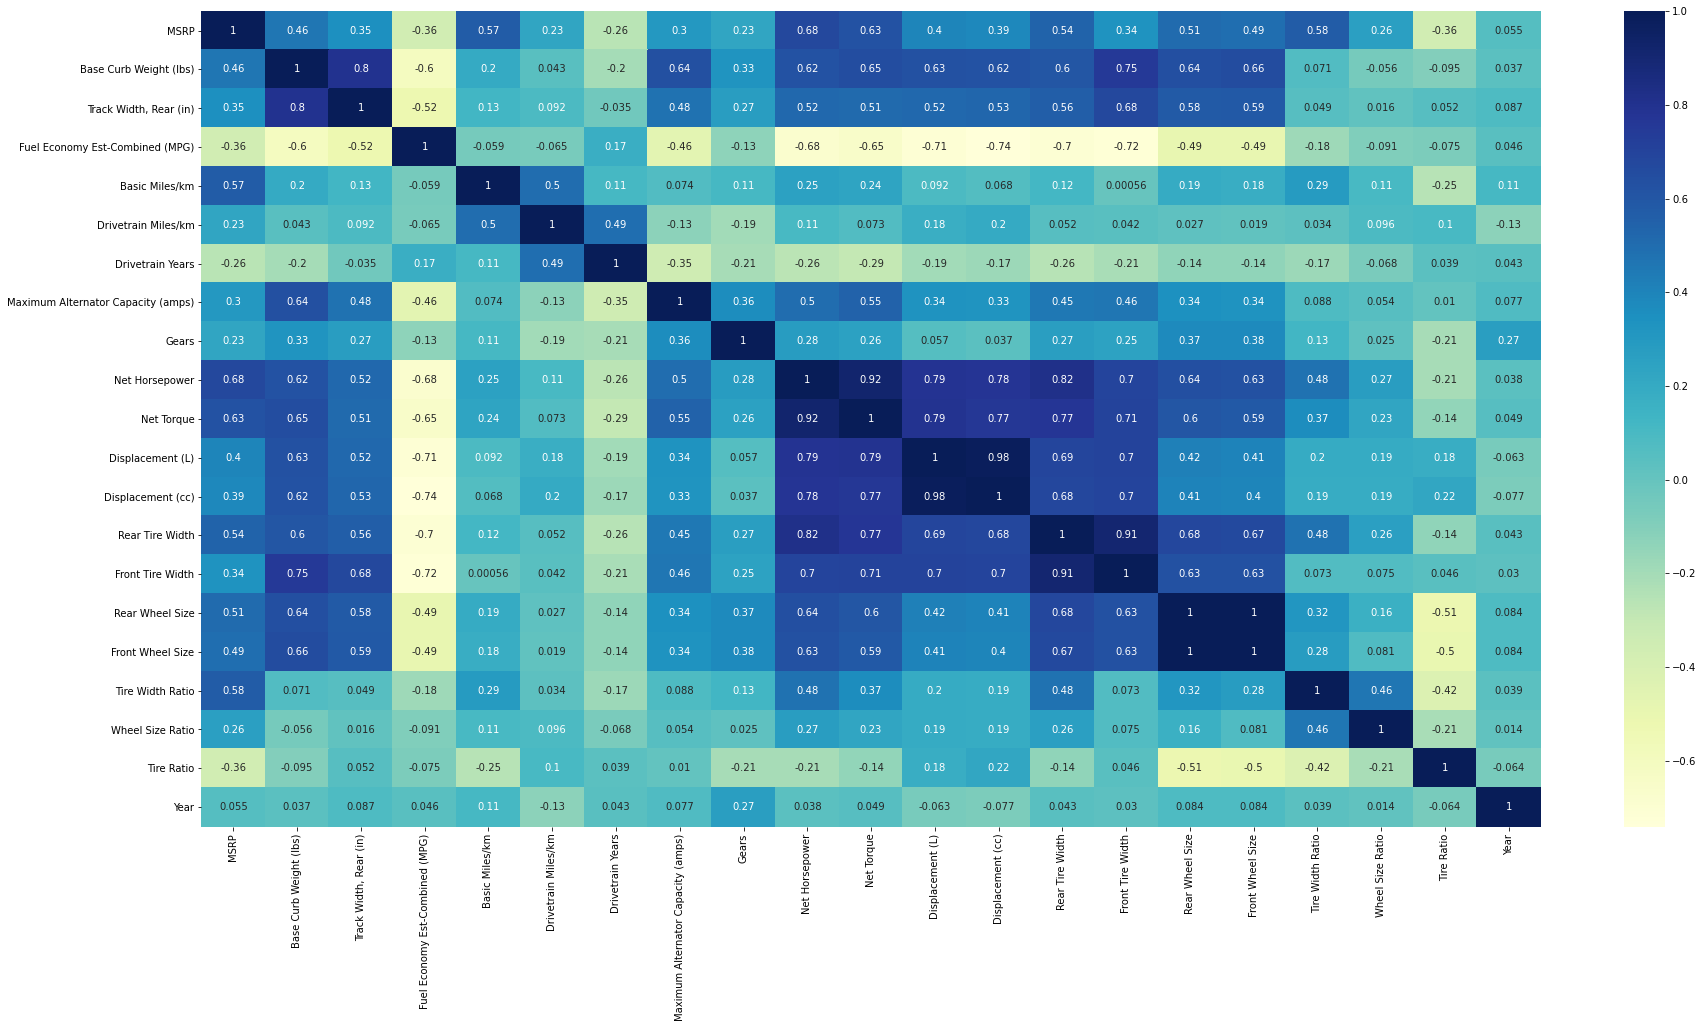

In [12]:
plt.figure(figsize = (30, 15))
cor=car_data_cleaned.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

Many independent variables are highly correlated.

Since  'Track Width, Front (in)' and 'Track Width, Rear (in)' are highly correlated with coefficient of 0.95, we will drop
'Track Width, Front (in)

Net Horse Power and Net Torque also highly correlated with coefficient of 0.92, so we will only use Net Horse Power
Front Tire Width and Rear Tire Width are highly correlated so we will use Rear Tire Width

In [13]:
car_data_cleaned.drop(['Net Torque','Displacement (cc)','Front Tire Width'],axis=1,inplace=True)

C:\Users\athir\anaconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Data Analysis

Lets visualize the data

#### Numerical Variables

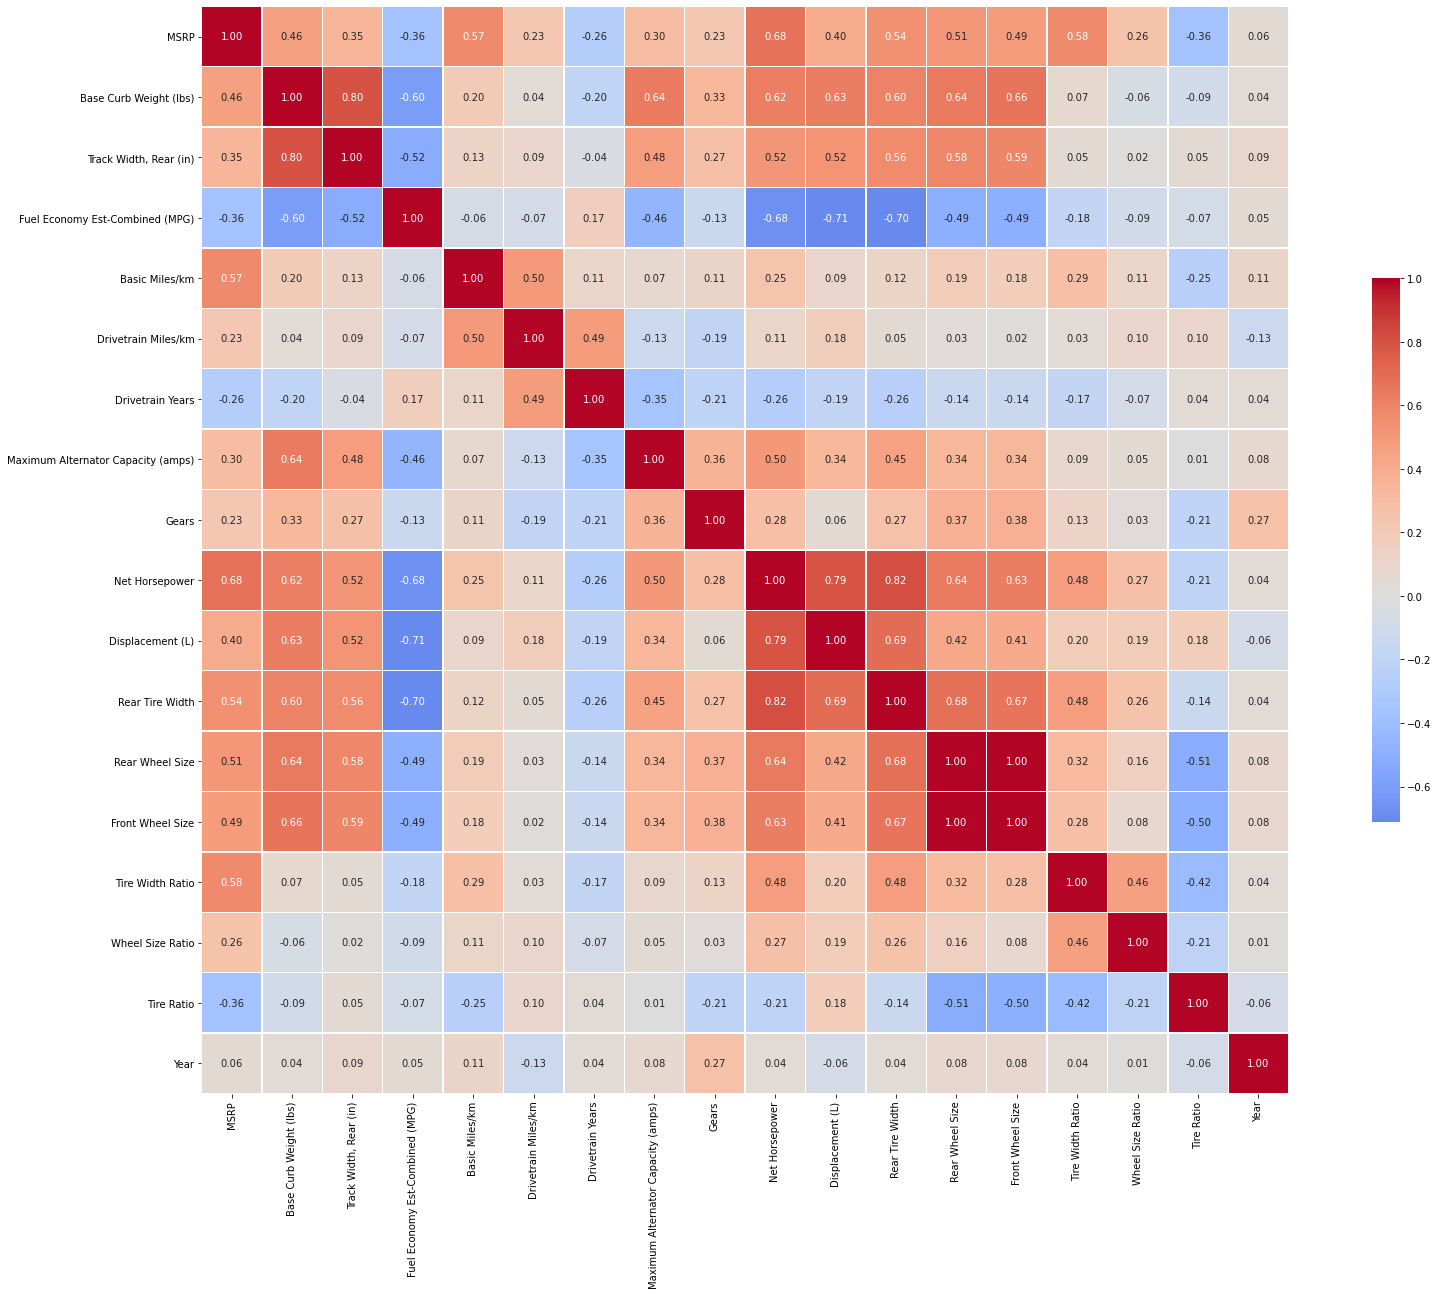

In [14]:
plt.figure(figsize = (30, 20))
cor=car_data_cleaned.corr()
sns.heatmap(cor, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap="coolwarm")
plt.show()

From the figure above, we now are able to identify which features influence the car prices. Below are the some of the features with positive correlation of 50% and above with the dependent price variable MSRP.
- Engine Horsepower
- Basic Miles (KM) / Mileage
- Tire Width ratio 
- Rear Wheel Size

Other positive variables also actually represent the size/weight/engine power of the car.

However, there are also a few variables showing a negative relationship with price variable:
- Fuel Economy (Combined)
- Tire Ratio
- Drive Train Years

In [15]:
car_data_cleaned.describe()

,MSRP,Base Curb Weight (lbs),"Track Width, Rear (in)",Fuel Economy Est-Combined (MPG),Basic Miles/km,Drivetrain Miles/km,Drivetrain Years,Maximum Alternator Capacity (amps),Gears,Net Horsepower,Displacement (L),Rear Tire Width,Rear Wheel Size,Front Wheel Size,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year
count,11408.000000,7516.000000,8289.000000,9581.000000,11457.000000,11457.000000,11457.000000,8296.000000,9928.000000,11419.000000,11306.000000,11456.000000,11457.000000,11457.000000,11456.000000,11457.000000,11449.000000,11457.000000
mean,46757.176893,3689.308010,62.720902,23.544202,45814.983504,67949.885136,5.247360,154.798819,6.686543,284.576670,2.999204,243.477654,17.895697,17.881295,1.014541,1.000765,5.254695,2016.610806
std,39978.632981,641.898088,2.405747,6.234195,17468.163488,20235.887070,1.445863,32.269034,1.292068,109.087889,1.397192,27.038376,1.419031,1.404196,0.045984,0.006333,1.164542,1.833207
min,11990.000000,1808.000000,54.500000,11.000000,36000.000000,36000.000000,3.000000,80.000000,1.000000,70.000000,1.000000,155.000000,14.000000,14.000000,1.000000,1.000000,3.000000,2014.000000
25%,29120.000000,3263.000000,61.200000,19.000000,36000.000000,60000.000000,5.000000,130.000000,6.000000,190.000000,2.000000,225.000000,17.000000,17.000000,1.000000,1.000000,4.000000,2015.000000
50%,37442.500000,3635.000000,62.400000,22.000000,36000.000000,60000.000000,5.000000,150.000000,6.000000,281.000000,3.000000,245.000000,18.000000,18.000000,1.000000,1.000000,5.000000,2016.000000
75%,49196.250000,4123.000000,64.200000,27.000000,50000.000000,70000.000000,5.000000,175.000000,8.000000,355.000000,4.000000,265.000000,19.000000,19.000000,1.000000,1.000000,6.000000,2018.000000
max,548800.000000,8591.000000,70.000000,109.000000,150000.000000,150000.000000,10.000000,332.000000,10.000000,808.000000,7.000000,355.000000,22.000000,22.000000,1.392157,1.058824,8.000000,2019.000000



Average price is around $46757.18,  
with the minimum price of $11990 and the maximum price of $548800


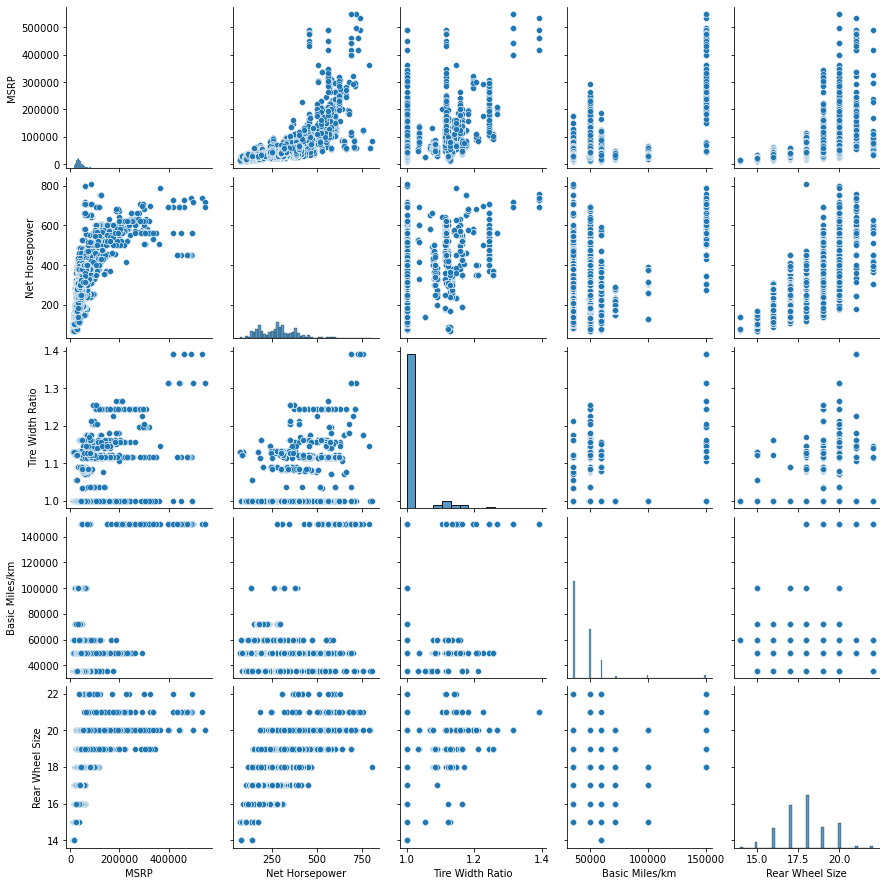

In [16]:
sns.pairplot(car_data_cleaned[['MSRP','Net Horsepower','Tire Width Ratio','Basic Miles/km','Rear Wheel Size']])

From the graph, we can see that:
 - MSRP is highly correlated with Engine Horsepower compared to the other variables. The value increases exponentially as we reach  a particular potential threshold.

After our analysis, we chose below variables which we believe is important in driving the price of the cars.

<AxesSubplot:xlabel='Tire Ratio', ylabel='MSRP'>

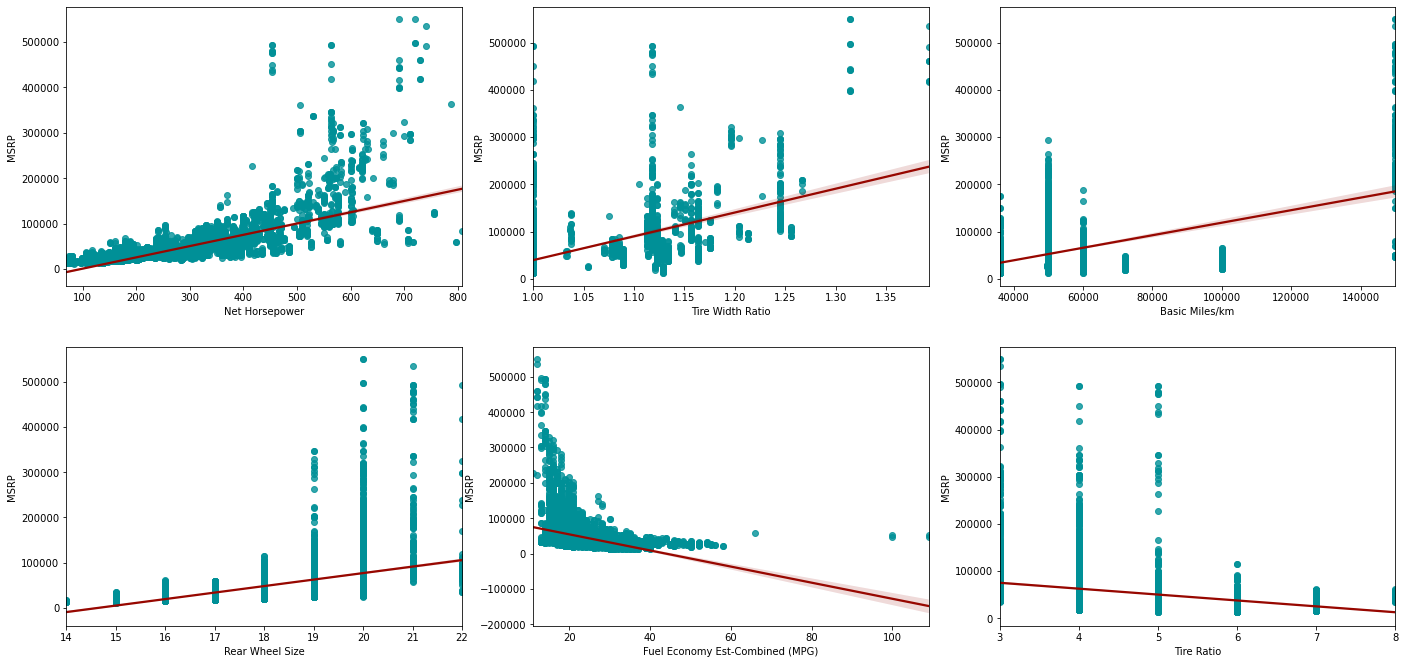

In [17]:
fig, axs = plt.subplots(2,3,figsize=(20,10))  

fig.tight_layout(pad=4.00)
sns.regplot(x='Net Horsepower', y='MSRP', data = car_data_cleaned, scatter_kws={"color": "#009097"}, line_kws={"color": "#970700"}, ax=axs[0,0])
sns.regplot(x='Tire Width Ratio', y='MSRP', data = car_data_cleaned, scatter_kws={"color": "#009097"}, line_kws={"color": "#970700"}, ax=axs[0,1])
sns.regplot(x='Basic Miles/km', y='MSRP', data = car_data_cleaned, scatter_kws={"color": "#009097"}, line_kws={"color": "#970700"}, ax=axs[0,2])
sns.regplot(x='Rear Wheel Size', y='MSRP', data = car_data_cleaned, scatter_kws={"color": "#009097"}, line_kws={"color": "#970700"}, ax=axs[1,0])
sns.regplot(x='Fuel Economy Est-Combined (MPG)', y='MSRP', data = car_data_cleaned, scatter_kws={"color": "#009097"}, line_kws={"color": "#970700"}, ax=axs[1,1])
sns.regplot(x='Tire Ratio', y='MSRP', data = car_data_cleaned, scatter_kws={"color": "#009097"}, line_kws={"color": "#970700"}, ax=axs[1,2])

#### Categorical variables

In [18]:
categorical_variables = list(car_data_cleaned.columns[car_data_cleaned.dtypes == 'object'])
categorical_variables

['Car_Make_Model_Style',
 'Maker',
 'Style Name',
 'Drivetrain',
 'Body Style',
 'EPA Classification',
 'Fuel System',
 'Steering Type',
 'Front Wheel Material',
 'Suspension Type - Front',
 'Suspension Type - Rear',
 'Air Bag-Frontal-Driver',
 'Air Bag-Frontal-Passenger',
 'Air Bag-Passenger Switch (On/Off)',
 'Air Bag-Side Body-Front',
 'Air Bag-Side Body-Rear',
 'Air Bag-Side Head-Front',
 'Air Bag-Side Head-Rear',
 'Brakes-ABS',
 'Child Safety Rear Door Locks',
 'Daytime Running Lights',
 'Traction Control',
 'Night Vision',
 'Rollover Protection Bars',
 'Fog Lamps',
 'Parking Aid',
 'Tire Pressure Monitor',
 'Back-Up Camera',
 'Stability Control',
 'Other Features',
 'Corrosion Miles/km',
 'Engine Configuration',
 'Engine Class']

<AxesSubplot:xlabel='Engine Configuration', ylabel='MSRP'>

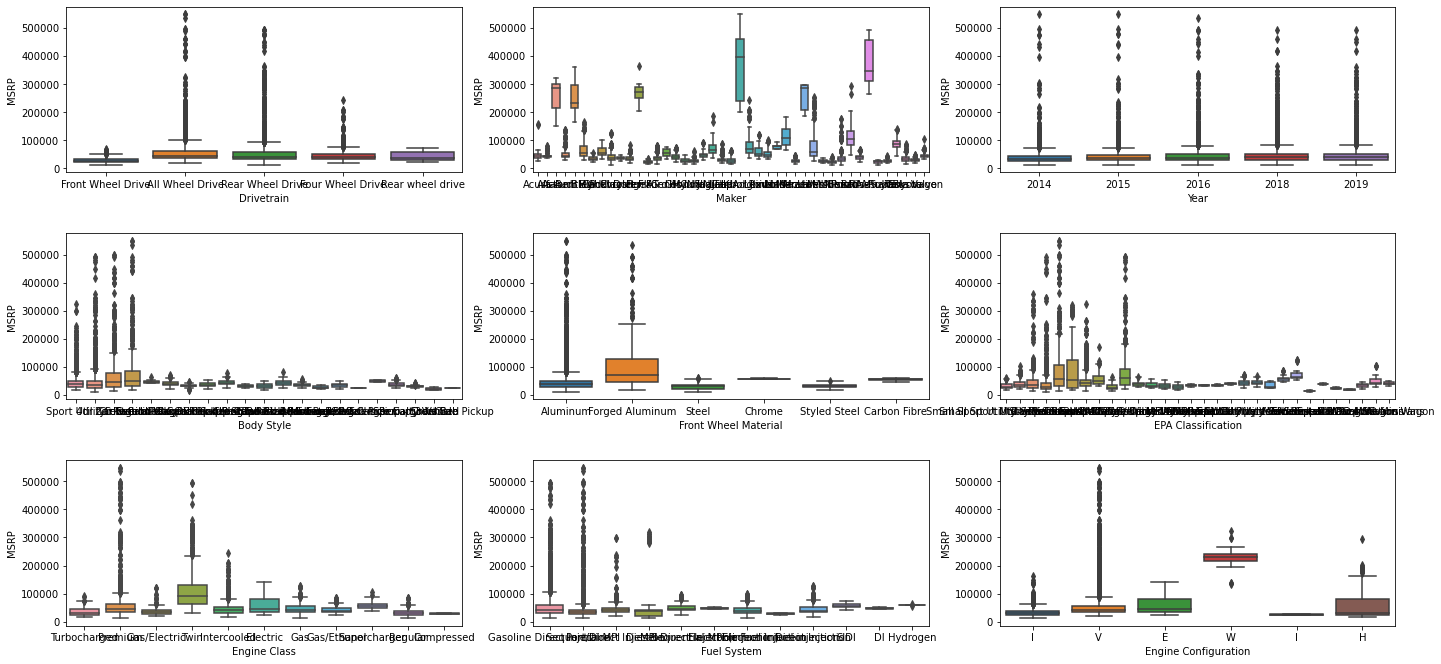

In [19]:
fig, axs = plt.subplots(3,3,figsize=(20,10)) 

fig.tight_layout(pad=4.00)
sns.boxplot(x='Drivetrain', y='MSRP', data = car_data_cleaned, ax=axs[0,0])
sns.boxplot(x='Maker', y='MSRP', data = car_data_cleaned, ax=axs[0,1])
sns.boxplot(x='Year', y='MSRP', data = car_data_cleaned, ax=axs[0,2])
sns.boxplot(x='Body Style', y='MSRP', data = car_data_cleaned, ax=axs[1,0])
sns.boxplot(x='Front Wheel Material', y='MSRP', data = car_data_cleaned, ax=axs[1,1])
sns.boxplot(x='EPA Classification', y='MSRP', data = car_data_cleaned, ax=axs[1,2])
sns.boxplot(x='Engine Class', y='MSRP', data = car_data_cleaned, ax=axs[2,0])
sns.boxplot(x='Fuel System', y='MSRP', data = car_data_cleaned, ax=axs[2,1])
sns.boxplot(x='Engine Configuration', y='MSRP', data = car_data_cleaned, ax=axs[2,2])

From the boxplot graph, we could identify which categorical variables play important factors in the pricing of the cars.

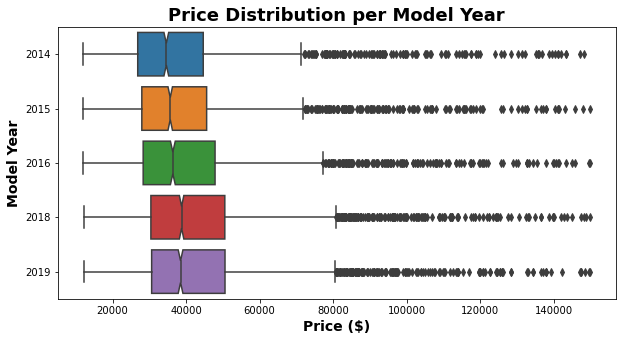

In [20]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
sns.boxplot(x='MSRP',y='Year',data=car_data_cleaned[car_data_cleaned.MSRP < 150000],
            order=sorted(car_data_cleaned.Year.unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
#ax.set_yticklabels(sorted(cc_data.modelYear.unique()))
plt.ylabel('Model Year',fontsize=14,fontweight="bold")
plt.title('Price Distribution per Model Year',fontsize=18,fontweight="bold")
plt.show()

The manufaturing year of the car also one of the determinant factor that drive the car pricing. However, we dont see very big differences in our case.

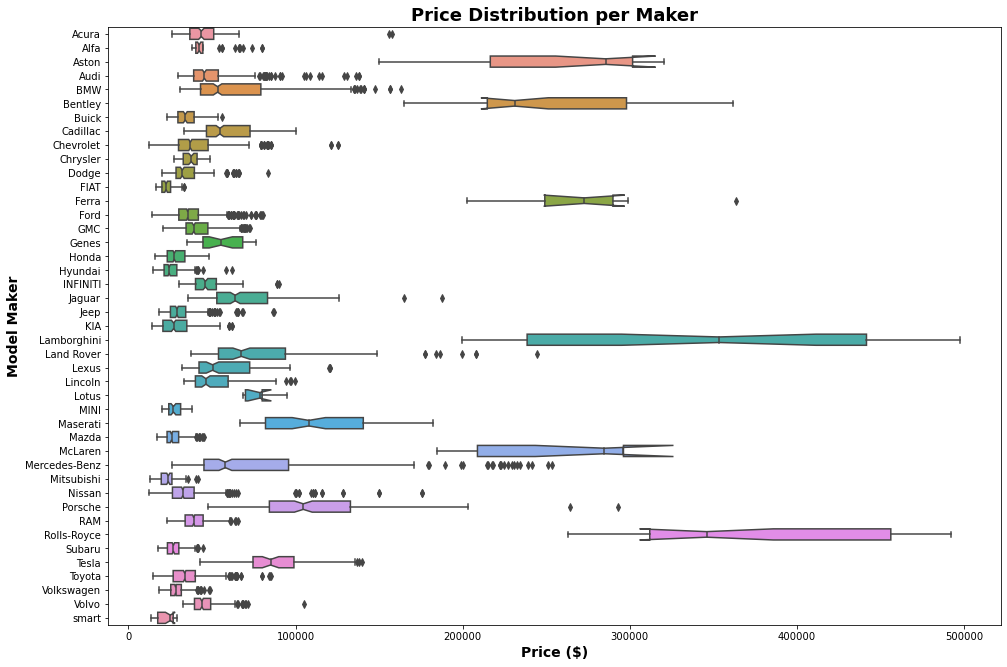

Average US car price:  46757.176893408134
Maker
Rolls-Royce      376823.125000
Lamborghini      360296.181818
Ferra            273879.000000
Aston            259491.750000
McLaren          251540.000000
Bentley          247736.666667
Porsche          114012.292683
Maserati         112463.435294
Tesla             89152.459016
Land Rover        80053.279221
Lotus             78364.000000
Mercedes-Benz     76900.778302
Jaguar            69270.339623
BMW               63424.600410
Cadillac          59677.368421
Lexus             56459.750000
Genes             55503.448276
Lincoln           51674.448052
Audi              49887.315271
INFINITI          48057.105263
Alfa              47515.888889
Volvo             45565.601504
Acura             45164.590164
GMC               41228.974359
Chevrolet         39863.889528
RAM               39769.102564
Chrysler          37214.571429
Ford              36849.990040
Nissan            34998.281453
Buick             34954.421965
Dodge             3490

In [41]:

# look at price by make boxplot
# limit upper prices so it's more informative
fig = plt.figure(figsize=(16,11))
ax = fig.gca()
sns.boxplot(x='MSRP',y='Maker',data=car_data_cleaned[car_data_cleaned.MSRP < 500000],
            order=sorted(car_data_cleaned.Maker.unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
#ax.set_yticklabels(sorted(cc_data.modelYear.unique()))
plt.ylabel('Model Maker',fontsize=14,fontweight="bold")
plt.title('Price Distribution per Maker',fontsize=18,fontweight="bold")
plt.show()
print('Average US car price: ',car_data_cleaned['MSRP'].mean())
print(car_data_cleaned.groupby('Maker').MSRP.mean().sort_values(ascending=False))

We can see how the prices vary with the different automobile companies in the US market. Hence company brand value is also is determining factor for the pricing of the car. Car Manufacturers like Rolls-Royce, Lamborghini, Ferra, Aston and Mclaren are on high end side and very far above the average US car price while other manufacturer like Mazda, Hyundai, Mitsubishi, FIAT and Smart are on lower end side with car pricing below average.

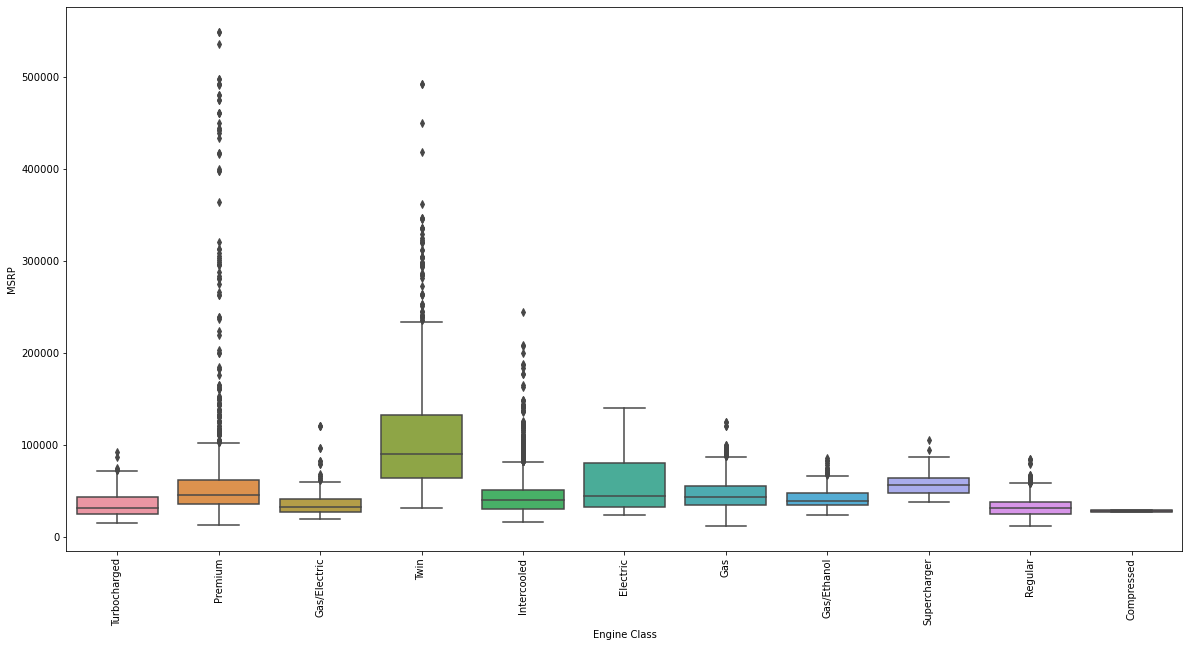

Average US car price:  46757.176893408134
Engine Class
Gas              46515.354839
Supercharger     57680.198020
Electric         58314.172185
Premium          71132.032859
Twin            110437.260023
Name: MSRP, dtype: float64


In [22]:
plt.figure(figsize=(20,10))
sns.boxplot(x = categorical_variables[-1], y = 'MSRP', data = car_data_cleaned,)
plt.xticks(rotation=90)
plt.show()
print('Average US car price: ',car_data_cleaned['MSRP'].mean())
print(car_data_cleaned.groupby('Engine Class').MSRP.mean().sort_values(ascending=True).tail())

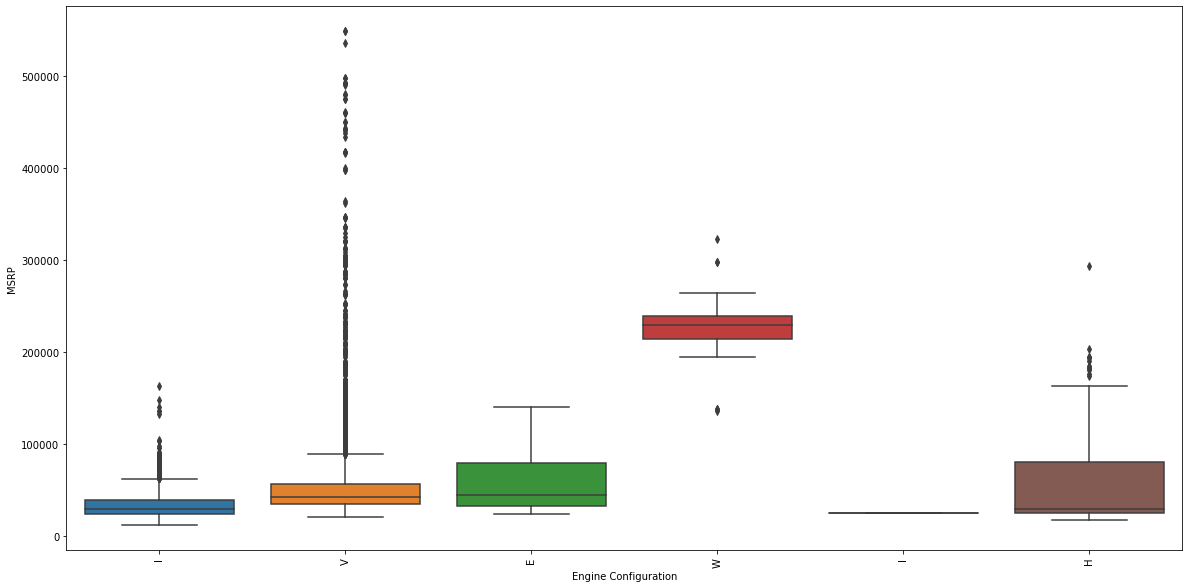

Average US car price:  46757.176893408134
Engine Configuration
E    58314.172185
V    56111.239794
H    53268.489736
I    32495.643833
l    25322.500000
Name: MSRP, dtype: float64


In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Engine Configuration', y = 'MSRP', data = car_data_cleaned,)
plt.xticks(rotation=90)
plt.show()
print('Average US car price: ',car_data_cleaned['MSRP'].mean())
print(car_data_cleaned.groupby('Engine Configuration').MSRP.mean().sort_values(ascending=False).tail())

Below graphs show further comparison, where high ends car are priced higher where their engine class falls under most desired category - Twin / Premium.

However, some of the cars with good Engine class are priced lower than the average market value, and vise versa. This might be due to the Car Manufacturer. However, we certainly need to include other main factors to produce concrete reasons.

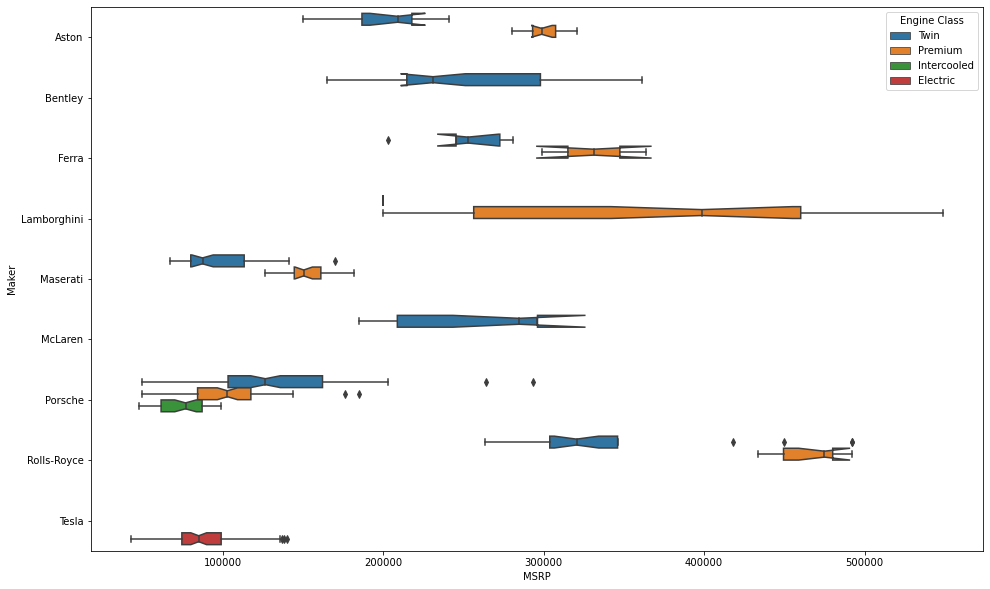

Average US car price:  46757.176893408134
Engine Class
Twin            110437.260023
Premium          71132.032859
Electric         58314.172185
Supercharger     57680.198020
Gas              46515.354839
Intercooled      44745.851741
Gas/Ethanol      42048.279661
Gas/Electric     36193.689189
Turbocharged     35753.682635
Regular          32265.025750
Compressed       28015.000000
Name: MSRP, dtype: float64


In [38]:
data_sample = car_data_cleaned[(car_data_cleaned.MSRP < 1000000) & (car_data_cleaned.Maker == 'Rolls-Royce') | (car_data_cleaned.Maker == 'Lamborghini') | (car_data_cleaned.Maker == 'Ferra')| (car_data_cleaned.Maker == 'Aston')| (car_data_cleaned.Maker == 'McLaren')| (car_data_cleaned.Maker == 'Bentley')| (car_data_cleaned.Maker == 'Porsche')| (car_data_cleaned.Maker == 'Tesla')| (car_data_cleaned.Maker == 'Maserati')]
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
sns.boxplot(x='MSRP',y='Maker',data=data_sample,hue='Engine Class',notch=True,orient='h')
plt.show()
print('Average US car price: ',car_data_cleaned['MSRP'].mean())
print(car_data_cleaned.groupby('Engine Class').MSRP.mean().sort_values(ascending=False))

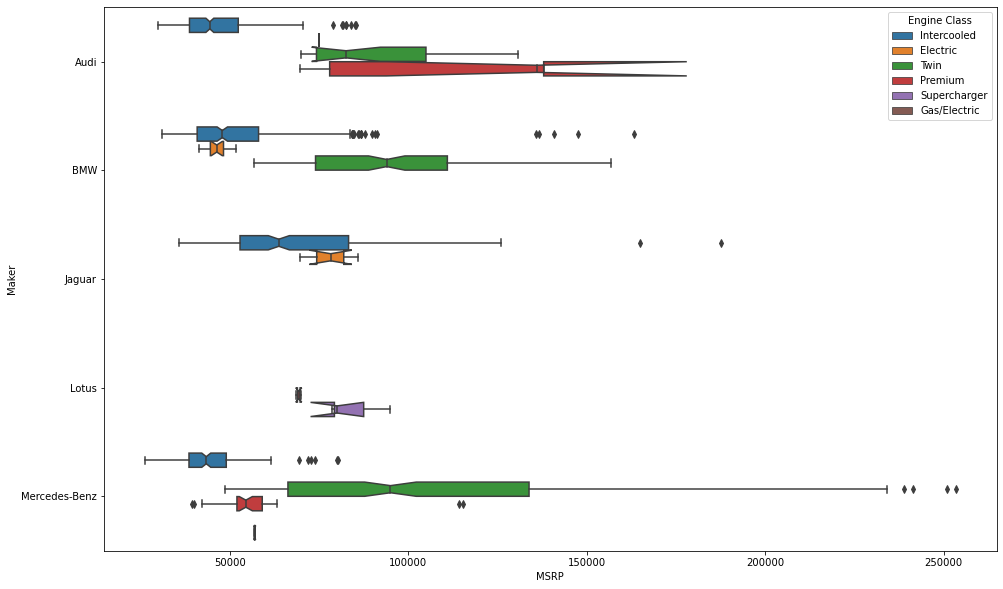

Average US car price:  46757.176893408134
Engine Class
Twin            110437.260023
Premium          71132.032859
Electric         58314.172185
Supercharger     57680.198020
Gas              46515.354839
Intercooled      44745.851741
Gas/Ethanol      42048.279661
Gas/Electric     36193.689189
Turbocharged     35753.682635
Regular          32265.025750
Compressed       28015.000000
Name: MSRP, dtype: float64


In [43]:
data_sample = car_data_cleaned[(car_data_cleaned.MSRP < 1000000) & (car_data_cleaned.Maker == 'Lotus') | (car_data_cleaned.Maker == 'Mercedes-Benz') | (car_data_cleaned.Maker == 'Jaguar')| (car_data_cleaned.Maker == 'BMW')| (car_data_cleaned.Maker == 'Audi')]
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
sns.boxplot(x='MSRP',y='Maker',data=data_sample,hue='Engine Class',notch=True,orient='h')
plt.show()
print('Average US car price: ',car_data_cleaned['MSRP'].mean())
print(car_data_cleaned.groupby('Engine Class').MSRP.mean().sort_values(ascending=False))

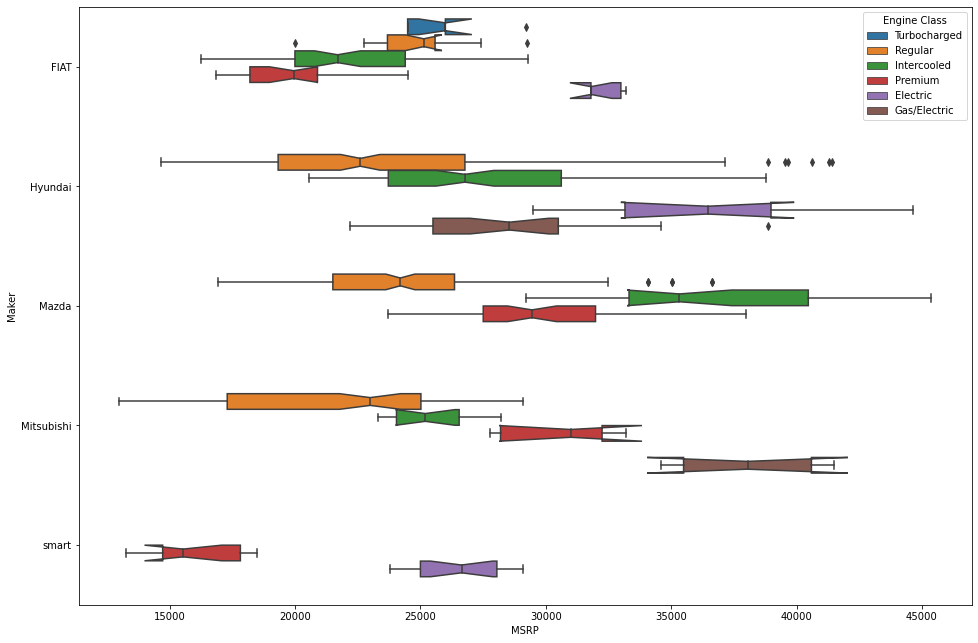

Average US car price:  46757.176893408134
Engine Class
Twin            110437.260023
Premium          71132.032859
Electric         58314.172185
Supercharger     57680.198020
Gas              46515.354839
Intercooled      44745.851741
Gas/Ethanol      42048.279661
Gas/Electric     36193.689189
Turbocharged     35753.682635
Regular          32265.025750
Compressed       28015.000000
Name: MSRP, dtype: float64


In [34]:
data_sample2 = car_data_cleaned[(car_data_cleaned.MSRP < 1000000) & (car_data_cleaned.Maker == 'Mazda') | (car_data_cleaned.Maker == 'Hyundai') | (car_data_cleaned.Maker == 'Mitsubishi')| (car_data_cleaned.Maker == 'FIAT')| (car_data_cleaned.Maker == 'smart')]
fig = plt.figure(figsize=(16,11))
ax = fig.gca()
sns.boxplot(x='MSRP',y='Maker',data=data_sample2,hue='Engine Class',notch=True,orient='h')
plt.show()
print('Average US car price: ',car_data_cleaned['MSRP'].mean())
print(car_data_cleaned.groupby('Engine Class').MSRP.mean().sort_values(ascending=False))

## Modelling - Incomplete

### Regression

In order to determine if a vehicle is a good value or not, we use linear regression to predict the price distribution for each combination of year, maker, and model, and then compare it to the actual price. If they are similar, then it is 'reasonable,' otherwise, the vehicle is priced too high or low vs the prediction.

In [26]:
#Data Preparation

X=car_data_cleaned.drop(columns=['MSRP'])
y=car_data_cleaned['MSRP']

In [27]:
# creating dummy variables for categorical variables

cars_dummies = pd.get_dummies(categorical_variables, drop_first=True)
cars_dummies.head()

,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Back-Up Camera,Body Style,Brakes-ABS,Car_Make_Model_Style,...,Other Features,Parking Aid,Rollover Protection Bars,Stability Control,Steering Type,Style Name,Suspension Type - Front,Suspension Type - Rear,Tire Pressure Monitor,Traction Control
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X=X.drop(columns=categorical_variables)
X.head(2)

,Base Curb Weight (lbs),"Track Width, Rear (in)",Fuel Economy Est-Combined (MPG),Basic Miles/km,Drivetrain Miles/km,Drivetrain Years,Maximum Alternator Capacity (amps),Gears,Net Horsepower,Displacement (L),Rear Tire Width,Rear Wheel Size,Front Wheel Size,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year
0,3790.0,64.7,24.0,50000,70000,6,NaN,10.0,272.0,2.0,235.0,19,19,1.0,1.0,5.0,2019
1,3829.0,64.7,24.0,50000,70000,6,NaN,10.0,272.0,2.0,235.0,19,19,1.0,1.0,5.0,2019


In [29]:
cars_dummies.columns

Index(['Air Bag-Frontal-Passenger', 'Air Bag-Passenger Switch (On/Off)',
       'Air Bag-Side Body-Front', 'Air Bag-Side Body-Rear',
       'Air Bag-Side Head-Front', 'Air Bag-Side Head-Rear', 'Back-Up Camera',
       'Body Style', 'Brakes-ABS', 'Car_Make_Model_Style',
       'Child Safety Rear Door Locks', 'Corrosion Miles/km',
       'Daytime Running Lights', 'Drivetrain', 'EPA Classification',
       'Engine Class', 'Engine Configuration', 'Fog Lamps',
       'Front Wheel Material', 'Fuel System', 'Maker', 'Night Vision',
       'Other Features', 'Parking Aid', 'Rollover Protection Bars',
       'Stability Control', 'Steering Type', 'Style Name',
       'Suspension Type - Front', 'Suspension Type - Rear',
       'Tire Pressure Monitor', 'Traction Control'],
      dtype='object')

## Conclusions

We can concluded that :

- The identified main driven factors represent the size/weight/engine power of the car.
 
- The manufacturer brand also important in driving the pricing value, where luxury car maker tends to priced way above the  average car value in the market.
 
- Reasonable approach : Determine predicted car prices using regression model and compare against current car prices for clearer view on the current pricing level either it is: ideal, Overpriced or Underpriced.
